## Exercise 1

thematic map

In [1]:
# importing necessary libraries

In [2]:
# downloading data

import pathlib
import geopandas
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data" 


# Read file using gpd.read_file()
rare_trees = geopandas.read_file(DATA_DIRECTORY / "puulajit_2015.shp")


ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
rare_trees.head()

,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,geometry
0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,7,"POLYGON ((536000.000 7776000.000, 535000.000 7..."
1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,8,"POLYGON ((537000.000 7776000.000, 536000.000 7..."
2,0,0,0,0,10,0,0,0,0,0,0,0,0,0,6,"POLYGON ((533000.000 7775000.000, 532000.000 7..."
3,0,0,0,0,12,0,0,0,0,0,0,0,0,0,24,"POLYGON ((534000.000 7775000.000, 533000.000 7..."
4,0,0,0,0,12,0,0,0,0,0,0,0,0,0,54,"POLYGON ((535000.000 7775000.000, 534000.000 7..."


In [4]:
type(rare_trees)

geopandas.geodataframe.GeoDataFrame

In [5]:
# rare_trees.plot()

In [6]:
len(rare_trees)

344578

In [6]:
print(rare_trees.crs)

EPSG:3067


In [7]:
# Read file using gpd.read_file()
municipal = geopandas.read_file(DATA_DIRECTORY / "maakunnat_2024_milj.shp")


In [8]:
# municipal.plot()

In [9]:
# rare trees in these municipalities
# absolute amounts?

In [1]:
municipal


NameError: name 'municipal' is not defined

In [23]:
pirka = municipal.loc[2:3]

In [24]:
pirka.head()

,GML_ID,NATCODE,NAMEFIN,NAMESWE,geometry
2,1601210021,12,Pohjois-Karjala,Norra Karelen,"POLYGON ((647019.938 7072707.548, 647875.536 7..."
3,1601210033,18,Kainuu,Kajanaland,"POLYGON ((626655.494 7255813.466, 626655.500 7..."


In [25]:
one = rare_trees.overlay(pirka, how="intersection")
# pohjois karjala ja kainuu

<Axes: >

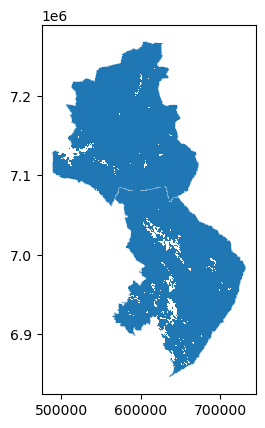

In [26]:
one.plot()

In [27]:
one.head()

,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,GML_ID,NATCODE,NAMEFIN,NAMESWE,geometry
0,0,0,0,0,8,0,0,0,1,0,0,0,0,0,66,1601210033,18,Kainuu,Kajanaland,"POLYGON ((602329.335 7268000.000, 602324.006 7..."
1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,78,1601210033,18,Kainuu,Kajanaland,"POLYGON ((603000.000 7268000.000, 603000.000 7..."
2,0,0,0,0,4,0,0,0,0,0,0,0,0,0,83,1601210033,18,Kainuu,Kajanaland,"POLYGON ((604000.000 7268000.000, 604000.000 7..."
3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,95,1601210033,18,Kainuu,Kajanaland,"POLYGON ((605000.000 7268000.000, 605000.000 7..."
4,0,0,0,0,6,0,0,0,0,0,0,0,0,0,99,1601210033,18,Kainuu,Kajanaland,"POLYGON ((606000.000 7268000.000, 606000.000 7..."


In [28]:
import matplotlib.pyplot as plt
# Display interactive widgets
# Import Pilow to add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw 
import pathlib
import geopandas as gpd
import os
import osmnx as ox
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

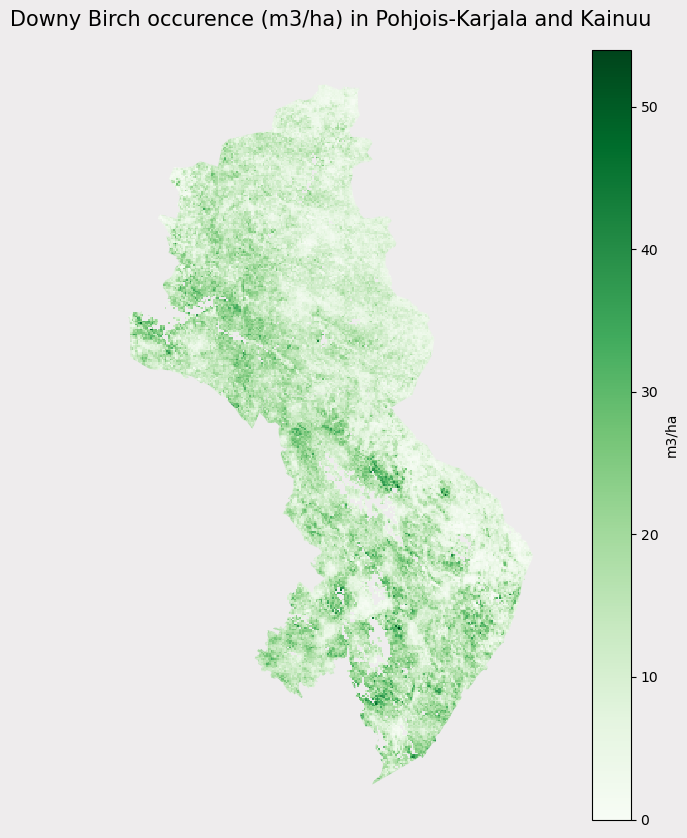

In [36]:
from matplotlib.patches import FancyArrowPatch
# Start figure
fig, ax = plt.subplots(figsize=(10, 10), facecolor="#eeeced")
ax.set_facecolor("#eeeced")

one.plot(ax=ax, column="hiko_ha", cmap='Greens', zorder=1, legend=True, legend_kwds={"label": "m3/ha", "orientation": "vertical"})

# Remove axis
ax.axis('off')

# Text and marker size
markersize = 10
fontsize = 10


for text in l.get_texts():
    text.set_color("#444444")

# set title
ax.set_title("Downy Birch occurence (m3/ha) in Pohjois-Karjala and Kainuu", loc='center', fontsize=15, fontweight='book')

fig.savefig("downy_birch.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)


# Legend
legend_elements = [Line2D([0], [0], marker='s', color="#1c6018", label='a',
                          markerfacecolor="#bcd399", markersize=markersize),
                   Line2D([0], [0], marker='s', color="#1c6018", label='b',
                          markerfacecolor="#a2c272", markersize=markersize),
                   Line2D([0], [0], marker='s', color="#1c6018", label='c',
                          markerfacecolor="#88b04c", markersize=markersize),
                   Line2D([0], [0], marker='s', color="#1c6018", label='d',
                          markerfacecolor="#6a893b", markersize=markersize),
                   Line2D([0], [0], marker='s', color="#1c6018", label='e',
                          markerfacecolor="#bcc0ca", markersize=markersize)]


                          

l = ax.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor='#feffef', framealpha=0.8,
              bbox_to_anchor=(0, 0.5), fontsize=fontsize, prop={'family': "monospace", 'size': fontsize})

In [11]:
# intersection

intersection = municipal.overlay(rare_trees, how="intersection")

In [12]:
# intersection.plot()

In [13]:
intersection.head()

,GML_ID,NATCODE,NAMEFIN,NAMESWE,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,geometry
0,1601210001,01,Uusimaa,Nyland,0,0,0,11,20,3,7,2,5,6,0,0,0,0,49,"POLYGON ((401949.902 6746283.262, 402000.000 6..."
1,1601210001,01,Uusimaa,Nyland,0,0,0,2,4,0,1,0,0,1,0,0,0,0,83,"POLYGON ((402662.436 6746389.445, 402713.879 6..."
2,1601210001,01,Uusimaa,Nyland,0,0,0,9,17,3,5,1,2,4,0,0,0,0,41,"POLYGON ((401508.060 6745710.041, 401731.562 6..."
3,1601210001,01,Uusimaa,Nyland,0,0,0,7,11,1,2,1,1,2,0,0,0,0,49,"POLYGON ((402845.972 6745000.000, 402000.000 6..."
4,1601210001,01,Uusimaa,Nyland,0,0,0,11,10,1,5,0,1,1,0,0,0,0,26,"POLYGON ((397258.069 6744059.536, 397381.918 6..."


In [14]:
len(intersection)

343413

In [37]:
intersection2 = rare_trees.overlay(municipal, how="intersection")

In [16]:
intersection2.head()

,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,GML_ID,NATCODE,NAMEFIN,NAMESWE,geometry
0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,7,1601210035,19,Lappi,Lappland,"POLYGON ((535044.861 7776000.000, 535666.297 7..."
1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,8,1601210035,19,Lappi,Lappland,"POLYGON ((536000.000 7776000.000, 536000.000 7..."
2,0,0,0,0,10,0,0,0,0,0,0,0,0,0,6,1601210035,19,Lappi,Lappland,"POLYGON ((532000.000 7775000.000, 532000.000 7..."
3,0,0,0,0,12,0,0,0,0,0,0,0,0,0,24,1601210035,19,Lappi,Lappland,"POLYGON ((533000.000 7775000.000, 533000.000 7..."
4,0,0,0,0,12,0,0,0,0,0,0,0,0,0,54,1601210035,19,Lappi,Lappland,"POLYGON ((534000.000 7775000.000, 534000.000 7..."


In [17]:
# intersection2.plot()

In [18]:
len(intersection2)

343413

In [19]:
intersection2.drop(columns=['GML_ID', 'NATCODE', 'NAMESWE'])

,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,NAMEFIN,geometry
0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,7,Lappi,"POLYGON ((535044.861 7776000.000, 535666.297 7..."
1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,8,Lappi,"POLYGON ((536000.000 7776000.000, 536000.000 7..."
2,0,0,0,0,10,0,0,0,0,0,0,0,0,0,6,Lappi,"POLYGON ((532000.000 7775000.000, 532000.000 7..."
3,0,0,0,0,12,0,0,0,0,0,0,0,0,0,24,Lappi,"POLYGON ((533000.000 7775000.000, 533000.000 7..."
4,0,0,0,0,12,0,0,0,0,0,0,0,0,0,54,Lappi,"POLYGON ((534000.000 7775000.000, 534000.000 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343408,0,0,0,4,6,1,0,1,0,0,0,0,0,0,48,Uusimaa,"POLYGON ((307000.000 6637000.000, 308000.000 6..."
343409,0,0,0,4,6,1,0,2,0,0,1,0,1,0,10,Uusimaa,"POLYGON ((308000.000 6637000.000, 308041.319 6..."
343410,0,0,0,3,2,0,0,1,1,1,0,0,0,0,14,Uusimaa,"POLYGON ((272000.000 6633194.756, 271901.647 6..."
343411,0,0,0,5,4,1,0,1,1,1,0,0,0,0,31,Uusimaa,"POLYGON ((272144.176 6633000.000, 272000.000 6..."


In [38]:
import numpy as np

dissolved_trees = intersection2.dissolve(by="NAMEFIN", aggfunc=np.sum)

#dissolved = intersection.dissolve(by="car_r_t")
#dissolved_trees = dissolved_trees.groupby("NAMEFIN").agg({
#    "column1": "sum",
#    "column2": "mean",
#    "column3": "max"
#})

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1790: FutureWarning: The provided callable <function sum at 0x7f30704d7d80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


In [21]:
dissolved_trees.head()

,geometry,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa,GML_ID,NATCODE,NAMESWE
NAMEFIN,,,,,,,,,,,,,,,,,,,
Ahvenanmaan maakunta,"MULTIPOLYGON (((87870.984 6690704.878, 87548.3...",0,447,235,15300,9655,3637,0,9818,2455,3099,145,1363,1508,235,109701,3306498726405,2121212121212121212121212121212121212121212121...,Landskapet ÅlandLandskapet ÅlandLandskapet Åla...
Etelä-Karjala,"MULTIPOLYGON (((511000.000 6752949.936, 510965...",2406,1683,9,75876,74222,15542,13096,1906,3815,9622,71,789,860,2415,446488,10977895862840,0909090909090909090909090909090909090909090909...,Södra KarelenSödra KarelenSödra KarelenSödra K...
Etelä-Pohjanmaa,"MULTIPOLYGON (((219715.997 6889000.000, 219381...",1313,5,0,26314,203847,19994,9609,55,2738,4963,0,304,304,1313,1065629,23472137756475,1414141414141414141414141414141414141414141414...,Södra ÖsterbottenSödra ÖsterbottenSödra Österb...
Etelä-Savo,"MULTIPOLYGON (((463557.530 6804291.851, 463000...",3859,4669,2051,195546,242735,31002,33746,8200,6245,28894,0,806,806,5910,1154359,27446340901397,1010101010101010101010101010101010101010101010...,Södra SavolaxSödra SavolaxSödra SavolaxSödra S...
Kainuu,"MULTIPOLYGON (((496000.000 7099716.876, 495536...",2873,66,1506,36986,269151,11261,5082,6,4373,701,0,7,7,4379,1952081,36225775786592,1818181818181818181818181818181818181818181818...,KajanalandKajanalandKajanalandKajanalandKajana...


In [22]:
len(dissolved_trees)

19

In [39]:
dissolved_trees = dissolved_trees.drop(columns=['GML_ID', 'NATCODE', 'NAMESWE'])

In [35]:
dissolved_trees.head(19)

,geometry,leku_ha,kataja_ha,muuhavu_ha,rako_ha,hiko_ha,haapa_ha,hleppa_ha,tleppa_ha,raita_ha,pihlaja_ha,tammi_ha,muulehti_h,muulp_tamm,muuhavu_lk,Metsat_maa
NAMEFIN,,,,,,,,,,,,,,,,
Ahvenanmaan maakunta,"MULTIPOLYGON (((87870.984 6690704.878, 87548.3...",0,447,235,15300,9655,3637,0,9818,2455,3099,145,1363,1508,235,109701
Etelä-Karjala,"MULTIPOLYGON (((511000.000 6752949.936, 510965...",2406,1683,9,75876,74222,15542,13096,1906,3815,9622,71,789,860,2415,446488
Etelä-Pohjanmaa,"MULTIPOLYGON (((219715.997 6889000.000, 219381...",1313,5,0,26314,203847,19994,9609,55,2738,4963,0,304,304,1313,1065629
Etelä-Savo,"MULTIPOLYGON (((463557.530 6804291.851, 463000...",3859,4669,2051,195546,242735,31002,33746,8200,6245,28894,0,806,806,5910,1154359
Kainuu,"MULTIPOLYGON (((496000.000 7099716.876, 495536...",2873,66,1506,36986,269151,11261,5082,6,4373,701,0,7,7,4379,1952081
Kanta-Häme,"MULTIPOLYGON (((292000.000 6741896.192, 291982...",848,836,417,60876,89883,17728,17638,3746,5446,9858,0,740,740,1265,391815
Keski-Pohjanmaa,"MULTIPOLYGON (((306539.074 7077742.320, 306188...",636,0,0,9928,79280,6065,3844,525,641,1034,0,94,94,636,441598
Keski-Suomi,"MULTIPOLYGON (((359167.866 6898883.990, 359134...",1812,403,393,129796,281540,28666,28219,1776,9019,16286,0,1002,1002,2205,1449804
Kymenlaakso,"MULTIPOLYGON (((463855.781 6726862.312, 463813...",667,1617,39,59849,54081,13334,4607,2713,2417,7362,0,500,500,706,350650


In [ ]:
# dissolved_trees.plot()

In [ ]:
# how to count rows together? number of trees

In [40]:
import matplotlib.pyplot as plt
# Display interactive widgets
# Import Pilow to add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw 
import pathlib
import geopandas as gpd
import os
import osmnx as ox
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

from color_palette_visualizer import run_visualizer
run_visualizer()

# Set the size of the plot
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

# Plot
dissolved_trees.plot(ax=ax, column='rako_ha', cmap='Greens')

# Remove the axis for a cleaner look
ax.set_axis_off()

# set title
ax.set_title("Silver Birch occurence (m3/ha)", fontsize=10, fontweight='bold')


ModuleNotFoundError: No module named 'color_palette_visualizer'

In [41]:
# Display interactive widgets
# Import Pilow to add text and a border to the map
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw 
import pathlib
import geopandas as gpd
import os
import osmnx as ox
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D

from color_palette_visualizer import run_visualizer
run_visualizer()

ModuleNotFoundError: No module named 'color_palette_visualizer'

In [42]:
# List to store colors

treeColors = []
for index, row in dissolved_trees.iterrows():
        if row['rako_ha'] > 0 and row['rako_ha'] <= 50000:
            color = "#bcd399"
            
        elif row['rako_ha'] > 50000 and row['rako_ha'] <= 120000:
            color = "#a2c272"
            
        elif row['rako_ha'] > 120000 and row['rako_ha'] <= 200000:
            color = "#88b04c"
            
        elif row['rako_ha'] > 200000:
            color = "#6a893b"
            
        else:
            color = "#bcc0ca"
             
        treeColors.append(color)


dissolved_trees["colours"] = treeColors

In [45]:
# Extract node coordinates from the graph
west, south, east, north = (
    dissolved_trees['x'].min(),
    dissolved_trees['y'].min(),
    dissolved_trees['x'].max(),
    dissolved_trees['y'].max()
)
margin = 0.001

KeyError: 'x'

In [47]:
geometry.xy

NotImplementedError: 

<Axes: >

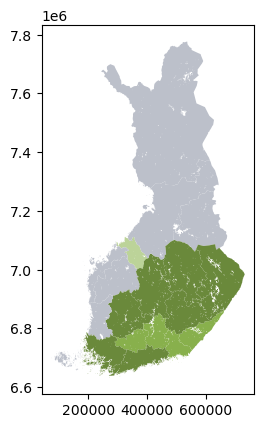

In [62]:

dissolved_trees.plot(color=dissolved_trees['colours'])



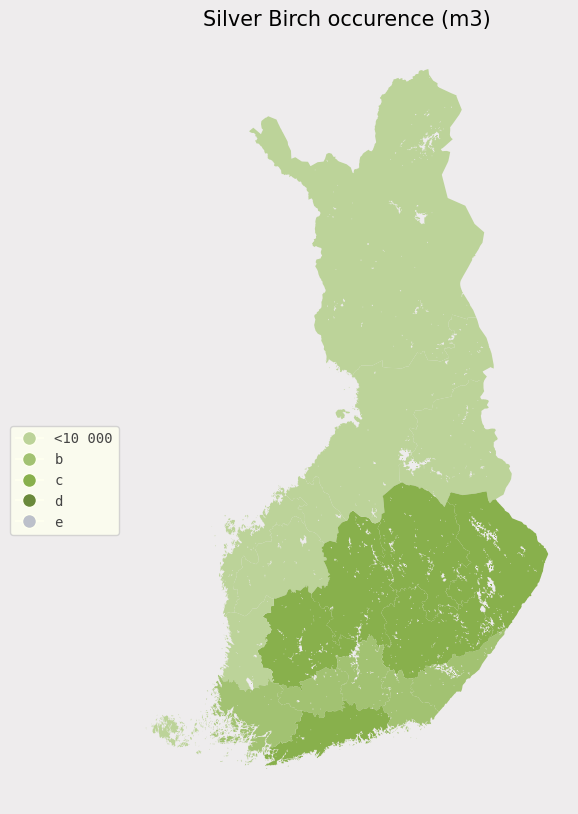

In [51]:
from matplotlib.patches import FancyArrowPatch
# Start figure
fig, ax = plt.subplots(figsize=(10, 10), facecolor="#eeeced")
ax.set_facecolor("#eeeced")

dissolved_trees.plot(ax=ax, color=dissolved_trees["colours"], zorder=1)

# Remove axis
ax.axis('off')

# Text and marker size
markersize = 10
fontsize = 10

# Legend
legend_elements = [Line2D([0], [0], marker='o', color="#feffef", label='<10 000',
                          markerfacecolor="#bcd399", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='b',
                          markerfacecolor="#a2c272", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='c',
                          markerfacecolor="#88b04c", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='d',
                          markerfacecolor="#6a893b", markersize=markersize),
                   Line2D([0], [0], marker='o', color="#feffef", label='e',
                          markerfacecolor="#bcc0ca", markersize=markersize)]

l = ax.legend(handles=legend_elements, frameon=True, ncol=1,
              facecolor='#feffef', framealpha=0.8,
              bbox_to_anchor=(0, 0.5), fontsize=fontsize, prop={'family': "monospace", 'size': fontsize})

for text in l.get_texts():
    text.set_color("#444444")

# set title
ax.set_title("Silver Birch occurence (m3)", loc='center', fontsize=15, fontweight='book')


fig.savefig("silver_birch.png", dpi=300, bbox_inches='tight', format="png", facecolor=fig.get_facecolor(), transparent=True)

In [ ]:
for rivi in dissolved_trees['rako_ha']:
    ax.plot(

#color=dissolved_trees['colours']

for geometry, color in zip(dissolved_trees["geometry"], treecolors):
    if geometry.geom_type == 'LineString':
        x, y = geometry.xy
        ax.plot(x, y, color=color, linewidth=width, solid_capstyle='round', zorder=1)